# **Transfer learning**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL 


In [ ]:
pip install tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import keras

In [ ]:
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

from keras.layers import BatchNormalization # it helps to standadise the values
from keras.layers import Dropout #control the over fit
from keras.optimizers import Adam

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
v=list(data_dir.glob("*/"))
v

[PosixPath('datasets/flower_photos/daisy'),
 PosixPath('datasets/flower_photos/LICENSE.txt'),
 PosixPath('datasets/flower_photos/dandelion'),
 PosixPath('datasets/flower_photos/tulips'),
 PosixPath('datasets/flower_photos/roses'),
 PosixPath('datasets/flower_photos/sunflowers')]

In [ ]:
v=list(data_dir.glob('*/*.jpg'))[:5]

In [ ]:
import cv2

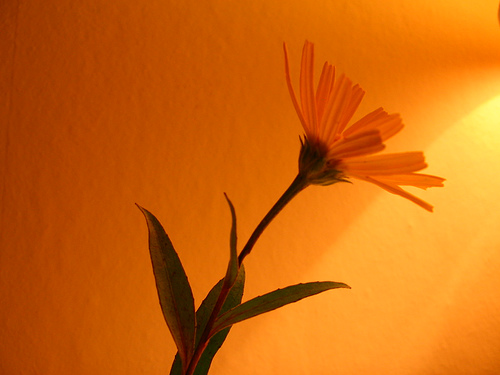

In [ ]:
PIL.Image.open(str(v[0]))

In [ ]:
training_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(180,180),
    batch_size=32)
    
    


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(180,180),
    batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names=training_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
model=Sequential()


pretrained=tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling="avg",
    classes=5)


```
# include_top=False,

```

for dimension 

```
#   layer.trainable=False
```
this is for no extra learning in weights


In [ ]:
for layer in pretrained.layers:
  layer.trainable=False

In [ ]:
model.add(pretrained)
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(5,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss="categorical_crossentropy",metrics="accuracy")

In [ ]:
history=model.fit(training_ds,
                  validation_data=validation_ds,
                  epochs=4)

Epoch 1/4
83/92 [==========================>...] - ETA: 39s - loss: 0.7416 - accuracy: 0.7733

KeyboardInterrupt: ignored

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/12338444334_72fcc2fc58_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg')]

In [ ]:
import cv2

In [ ]:
image=cv2.imread(str(roses[0]))
resize=cv2.resize(image,(180,180))
img=np.expand_dims(resize,axis=0)

In [ ]:
pre=model.predict(img)
pre

1/1 [==============================] - 2s 2s/step


array([[0.00341251, 0.00205899, 0.5342352 , 0.00388506, 0.4564082 ]],
      dtype=float32)

In [ ]:
class_names[np.argmax(pre)]

'roses'